<a href="https://colab.research.google.com/github/DataScienceAndEngineering/deep-learning-final-project-project-sidewalk/blob/rabiul/notebooks%20/Rabiul/SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Lib

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import roberts, sobel, scharr, prewitt
from scipy import ndimage as nd

## Downloading Data

In [ ]:
%%time
!gdown --id 12rNfOiM4allOn8t4l0ErpvgmA9hEZPh2 -O processed_labels.zip
!gdown --id 145Ul0rdbQcX98lQz8IO5eOtI0ZlvKwz6 -O processed_images.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12rNfOiM4allOn8t4l0ErpvgmA9hEZPh2
To: /content/processed_labels.zip
100% 2.73M/2.73M [00:00<00:00, 188MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=145Ul0rdbQcX98lQz8IO5eOtI0ZlvKwz6
To: /content/processed_images.zip
100% 572M/572M [00:05<00:00, 100MB/s]
CPU times: user 386 ms, sys: 72.4 ms, total: 458 ms
Wall time: 42.6 s


In [ ]:
%%time
!unzip /content/processed_images.zip
!unzip /content/processed_labels.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/processed_images/frankfurt_000001_044525.png  
  inflating: content/processed_images/monchengladbach_000000_001294.png  
  inflating: content/processed_images/munster_000093_000019.png  
  inflating: content/processed_images/strasbourg_000001_006562.png  
  inflating: content/processed_images/hanover_000000_056142.png  
  inflating: content/processed_images/aachen_000015_000019.png  
  inflating: content/processed_images/stuttgart_000094_000019.png  
  inflating: content/processed_images/hanover_000000_045446.png  
  inflating: content/processed_images/hanover_000000_019938.png  
  inflating: content/processed_images/cologne_000130_000019.png  
  inflating: content/processed_images/hamburg_000000_055894.png  
  inflating: content/processed_images/monchengladbach_000000_011383.png  
  inflating: content/processed_images/munster_000141_000019.png  
  inflating: content/processed_images/strasbourg_000001_033448.png  


In [ ]:
img_path = '/content/content/processed_images/*'
lab_path = '/content/content/processed_labels/*'


In [ ]:
#loading the data indo a list, numpy array
%%time
train_images = glob.glob(img_path)
train_labels = glob.glob(lab_path)

print(len(train_images))
print(len(train_labels))

3277
3277
CPU times: user 12.4 ms, sys: 3.12 ms, total: 15.5 ms
Wall time: 15 ms


# Pre_processing

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [ ]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-9oq4s6wm
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-9oq4s6wm
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36610 sha256=64a328571a0c042f93e429ce4047e715f4ea2acac17893375202d30c6e4a6bb2
  Stored in directory: /tmp/pip-ephem-wheel-cache-h77_5rwy/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [ ]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.1 MB/s eta 0:00:00


In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [ ]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [ ]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [ ]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
IMAGE_PATH=train_images[1]

In [ ]:
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

`SamAutomaticMaskGenerator` returns a `list` of masks, where each mask is a `dict` containing various information about the mask:

* `segmentation` - `[np.ndarray]` - the mask with `(W, H)` shape, and `bool` type
* `area` - `[int]` - the area of the mask in pixels
* `bbox` - `[List[int]]` - the boundary box of the mask in `xywh` format
* `predicted_iou` - `[float]` - the model's own prediction for the quality of the mask
* `point_coords` - `[List[List[float]]]` - the sampled input point that generated this mask
* `stability_score` - `[float]` - an additional measure of mask quality
* `crop_box` - `List[int]` - the crop of the image used to generate this mask in `xywh` format

In [ ]:
print(sam_result[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


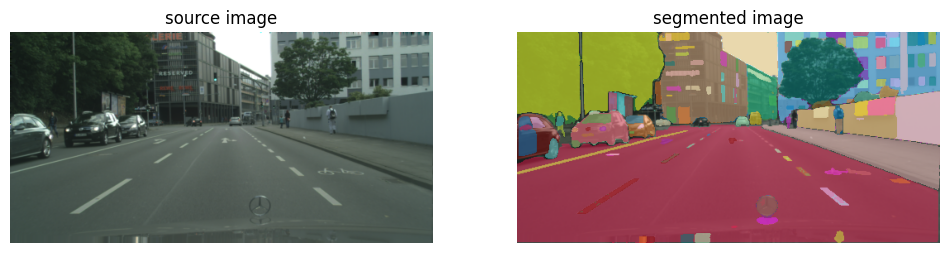

In [ ]:
mask_annotator = sv.MaskAnnotator()

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

In [ ]:
m = load_img(IMAGE_PATH)

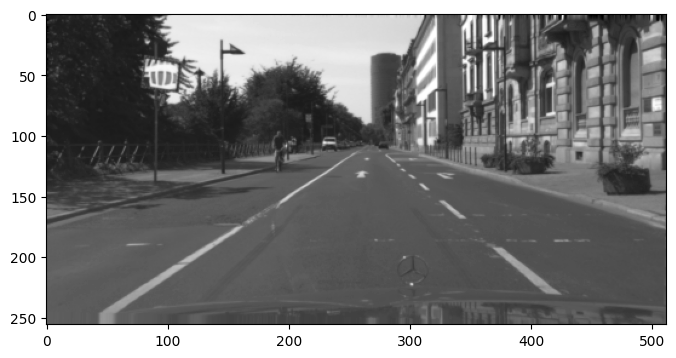

In [ ]:
display_img(m)

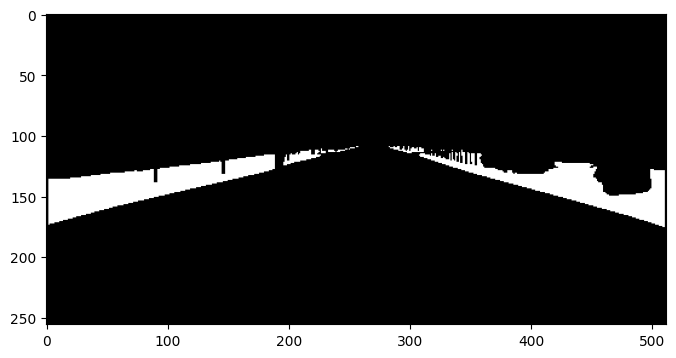

In [ ]:
l = load_img(train_labels[0])
display_img(l)

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)

In [ ]:

masks2 = mask_generator_2.generate(image)

In [ ]:
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
masks = mask_generator.generate(image)

In [ ]:
print(len(masks))
print(masks[0].keys())

132
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [ ]:
masks[0]['segmentation'].shape

(256, 512)

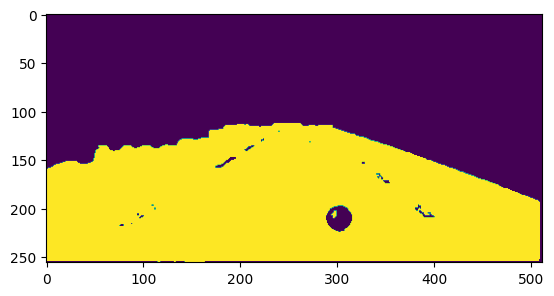

In [ ]:
plt.imshow(masks[0]['segmentation'])

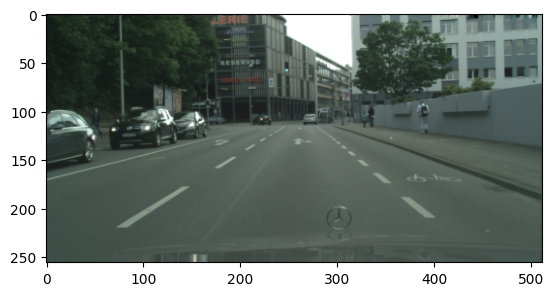

In [ ]:
plt.imshow(image)

In [ ]:
len(masks)

132

In [ ]:
masks

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 57922,
  'bbox': [0, 113, 509, 142],
  'predicted_iou': 1.0254064798355103,
  'point_coords': [[184.0, 236.0]],
  'stability_score': 0.9610542058944702,
  'crop_box': [0, 0, 512, 256]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 5989,
  'bbox': [317, 8, 101, 83],

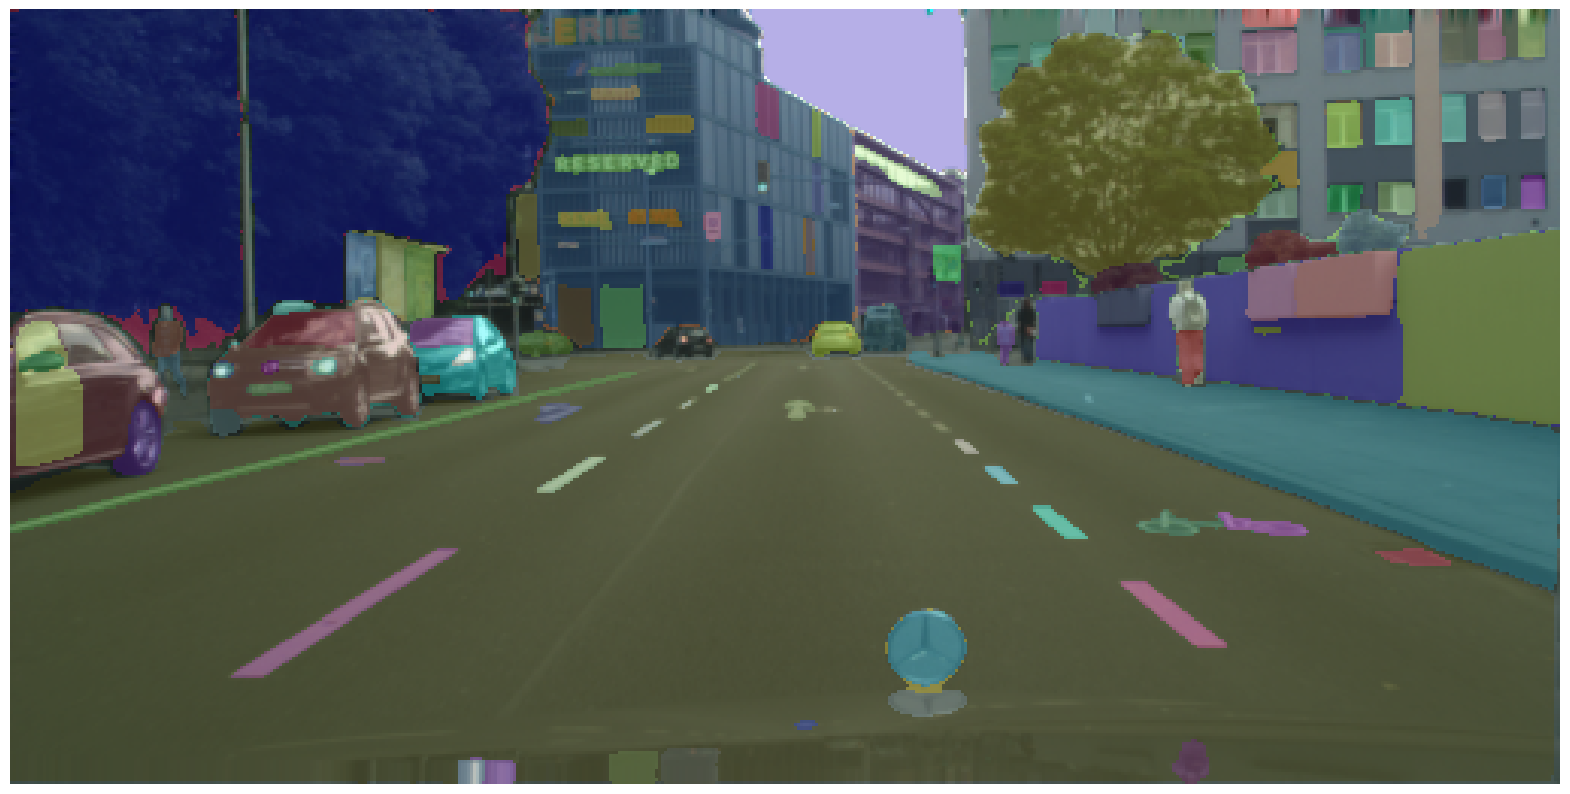

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

# **SAM**

In [ ]:
pip install 'git+https://github.com/facebookresearch/segment-anything.git'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-nmk012b9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-nmk012b9
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36610 sha256=fc2b3fe48b4be9bfc46cd36b36da5cfb59bfc3df3bee74ac09010991d2d49058
  Stored in directory: /tmp/pip-ephem-wheel-cache-eamjfxfl/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [ ]:
pip install -q roboflow supervision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
import torch
from segment_anything import sam_model_registry

#Function

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [ ]:
def gabor_feature_extraction(img, lamda, gamma):
  kernel = cv2.getGaborKernel((8, 8), 1, 0, lamda, gamma, 0, ktype=cv2.CV_32F)
  gabor_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
  return gabor_img.reshape(-1,1)


In [ ]:
def preprocess_image(img):
  #function will accept a numpy.ndarray

  #GAUSSIAN blur 1
  gblur = cv2.GaussianBlur(img, (5,5),7)
  #Laplacian
  laplacian = cv2.Laplacian(m1, cv2.CV_64F, ksize=7) 
  #SOBEL
  sobele = cv2.Sobel(img,cv2.CV_64F, 0,1,ksize=5)
  #CANNY 
  cany = cv2.Canny(np.uint8(s1), 100,200)

  #return cany
  return (gblur.reshape(-1)/255,laplacian.reshape(-1)/255,sobele.reshape(-1)/sobele.max(),cany.reshape(-1)/255)

In [ ]:
def display_img(img):
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [ ]:
def load_img(image_path):
  return cv2.imread(image_path, 0).astype(np.float32)/255

In [ ]:
def generate_one_test_image(image_dir):
  img = cv2.imread(image_dir, 0)
  g1 = img/255
  _,thresh3  = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY_INV)
  binay_inv = thresh3/255
  adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11, 11)/255
  gb1 = gabor_feature_extraction(img,.8, .05 )/255
  gb2 = gabor_feature_extraction(img,1.6, .5 )/255
  blur, laplacian, sobel, cany = preprocess_image(m2)
  return np.hstack((g1.reshape(-1,1), binay_inv.reshape(-1,1), adaptive_thresh.reshape(-1,1), 
                    gb1.reshape(-1,1), gb2.reshape(-1,1), blur.reshape(-1,1), 
                    laplacian.reshape(-1,1), sobel.reshape(-1,1), cany.reshape(-1,1)))


In [ ]:
def generate_one_test_image_df(image_dir):
  test_df = pd.DataFrame()
  #img = cv2.imread(image_dir, 0)
  img = image_dir
  g1 = img/255
  _,thresh3  = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY_INV)
  binay_inv = thresh3/255
  adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11, 11)/255
  gb1 = gabor_feature_extraction(img,.8, .05 )/255
  gb2 = gabor_feature_extraction(img,1.6, .5 )/255
  blur, laplacian, sobel, cany = preprocess_image(img)

  test_df['gray']= g1.reshape(-1)
  test_df['binay_inv']= binay_inv.reshape(-1)
  test_df['adaptive_thresh']=adaptive_thresh.reshape(-1)
  test_df['gabor1'] = gabor_feature_extraction(img,.8, .05 ).reshape(-1)
  test_df['gabor2'] = gabor_feature_extraction(img,1.6, .5 ).reshape(-1)
  test_df['blur'], test_df['laplacian'], test_df['sobelx'], test_df['canny'] = blur.reshape(-1), laplacian.reshape(-1), sobel.reshape(-1), cany.reshape(-1)

  return test_df


In [ ]:
def load_img(image_path):
  return cv2.imread(image_path, 0).astype(np.float32)/255

In [ ]:
def display_img(img):
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

# segment

In [ ]:
!pip install numpy matplotlib opencv-python-headless

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread(train_images[0])

In [ ]:
print(len(train_images))
print(len(train_labels))

In [ ]:
train_images[0]

In [ ]:
segmented = segment_anything(img)

In [ ]:
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(segmented)

In [ ]:
$ wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

In [ ]:
def segment_anything(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding to create a binary image
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
    
    # Apply morphological closing to fill in gaps and holes
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create a mask for the segmented object(s)
    mask = np.zeros_like(binary)
    for contour in contours:
        cv2.drawContours(mask, [contour], 0, 255, -1)
    
    # Apply the mask to the original image
    segmented = cv2.bitwise_and(img, img, mask=mask)
    
    return segmented
